In [1]:
import argparse
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import zipfile

from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix)
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import (AveragePooling2D, Dense, Dropout, Flatten, Input, MaxPooling2D)
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import (ImageDataGenerator,img_to_array, load_img)
from tensorflow.keras.utils import to_categorical

In [1]:
from utils import *

### Loading the trained Model

In [10]:
model = get_model()
model.load_weights('Mobile-red-only-weights.h5')

In [14]:
test_dir = 'Data/test'
df_test = pd.DataFrame({'files': getFiles(test_dir)})

### Test Generator

In [15]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 3
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test, 
    x_col='files',
    y_col=None,
    target_size=IMAGE_SIZE,
    class_mode=None,
    batch_size=BATCH_SIZE
)

Found 9 validated image filenames.


In [23]:
pred = model.predict(test_generator, verbose=1)
preds = [i[0] < 0.1 for i in pred]

3/3 [==============================] - 0s 85ms/step


In [ ]:
def show(df, preds, top=9):
    m = {1:'Blood', 0:'No-Blood'}
    plt.figure(figsize=(15, 15))
    ncols = 3
    nrows = min(top, len(preds) // ncols)
    
    for i in range(0, min(nrows*ncols, top)):
        plt.subplot(nrows, ncols, i+1)
        image = plt.imread(df.iloc[i][0])
        plt.imshow(image)
        plt.title(m[preds[i]], color=('red' if preds[i] else 'blue'))
        
    plt.show()

### Predicting the Images

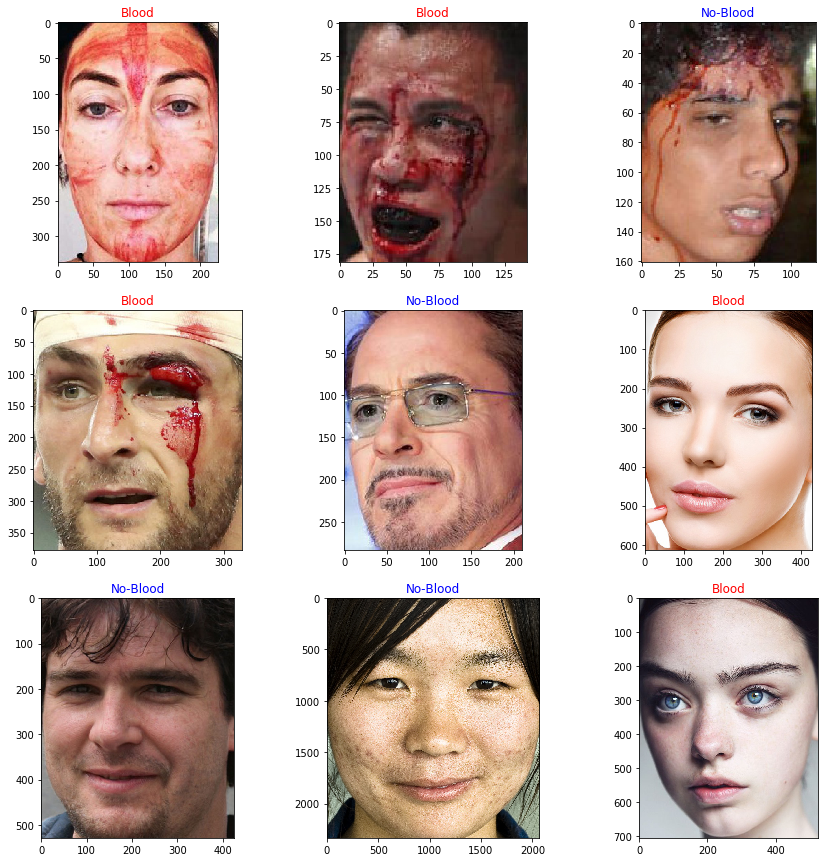

In [33]:
show(df_test, preds)